In [1]:
!wget https://crisisnlp.qcri.org/data/crisismmd/CrisisMMD_v1.0.tar.gz

--2025-03-21 15:41:11--  https://crisisnlp.qcri.org/data/crisismmd/CrisisMMD_v1.0.tar.gz
Resolving crisisnlp.qcri.org (crisisnlp.qcri.org)... 37.186.61.208
Connecting to crisisnlp.qcri.org (crisisnlp.qcri.org)|37.186.61.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1901224486 (1.8G) [application/x-gzip]
Saving to: ‘CrisisMMD_v1.0.tar.gz’

CrisisMMD_v1.0.tar. 100%[===================>]   1.77G  8.28MB/s    in 7m 17s  

2025-03-21 15:48:29 (4.15 MB/s) - ‘CrisisMMD_v1.0.tar.gz’ saved [1901224486/1901224486]



In [2]:
!tar -xf *.tar.gz
!rm *.tar.gz

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Concatenate, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform, glorot_normal
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.utils import class_weight
import random

In [2]:
a = pd.read_table('annotations/california_wildfires_final_data.tsv')

In [3]:
a = a.dropna(axis=0, subset=['image_human'])

In [4]:
imgloclist = list(a['image_path'])

In [5]:
imgloclist[0]

'data_image/california_wildfires/10_10_2017/917791044158185473_0.jpg'

In [6]:
imglist = []
for imgloc in imgloclist:
    i = cv2.imread(imgloc)
    imglist.append(cv2.resize(i, dsize=(224, 224), interpolation=cv2.INTER_CUBIC))

In [7]:
X = np.array(imglist)

In [8]:
shapelist = []
for img in imglist:
    shapelist.append(img.shape)
k = list(shapelist[0])
for s in shapelist:
    for i in range(3):
        k[i] = k[i] + s[i]
for i in range(3):
    k[i] = k[i] - shapelist[0][i]
    k[i] = k[i]/3533
print(k)

[82.86668553637135, 82.86668553637135, 1.1098216812906878]


In [9]:
len(imglist)

1307

In [10]:
set(list(a['image_human']))

{'affected_individuals',
 'infrastructure_and_utility_damage',
 'injured_or_dead_people',
 'missing_or_found_people',
 'not_relevant_or_cant_judge',
 'other_relevant_information',
 'rescue_volunteering_or_donation_effort',
 'vehicle_damage'}

In [11]:
labellist = []
clas0list = []
clas1list = []
clas2list = []
clas3list = []
clas4list = []
clas5list = []
clas6list = []
clas7list = []
i = 0
for label in list(a['image_human']):
    if label == 'not_relevant_or_cant_judge':
        labellist.append(0)
        clas0list.append(imglist[i])
    elif label == 'infrastructure_and_utility_damage':
        labellist.append(1)
        clas1list.append(imglist[i])
    elif label == 'affected_individuals':
        labellist.append(2)
        clas2list.append(imglist[i])
    elif label == 'injured_or_dead_people':
        labellist.append(3)
        clas3list.append(imglist[i])
    elif label == 'missing_or_found_people':
        labellist.append(4)
        clas4list.append(imglist[i])
    elif label == 'rescue_volunteering_or_donation_effort':
        labellist.append(5)
        clas5list.append(imglist[i])
    elif label == 'vehicle_damage':
        labellist.append(6)
        clas6list.append(imglist[i])
    elif label == 'other_relevant_information':
        labellist.append(7)
        clas7list.append(imglist[i])
    i+=1
labellist = np.array(labellist)

In [12]:
X_input = []
Y_input = []

In [13]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas0list))

X_0 = []
k = 0
for X1 in datagen.flow(x=np.array(clas0list)):
    l = 0
    for i in X1:
        X_0.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(0)
        k+=1
        l+=1
    if k >= 2000:
        break
X_0 = np.array(X_0)

In [14]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas1list))

X_1 = []
k = 0
for X1 in datagen.flow(x=np.array(clas1list)):
    l = 0
    for i in X1:
        X_1.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(1)
        k+=1
        l+=1
    if k >= 2000:
        break
X_1 = np.array(X_1)

In [15]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas2list))

X_2 = []
k = 0
for X1 in datagen.flow(x=np.array(clas2list)):
    l = 0
    for i in X1:
        X_2.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(2)
        k+=1
        l+=1
    if k >= 2000:
        break
X_2 = np.array(X_2)

In [16]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas3list))

X_3 = []
k = 0
for X1 in datagen.flow(x=np.array(clas3list)):
    l = 0
    for i in X1:
        X_3.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(3)
        k+=1
        l+=1
    if k >= 2000:
        break
X_3 = np.array(X_3)

In [17]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas4list))

X_4 = []
k = 0
for X1 in datagen.flow(x=np.array(clas4list)):
    l = 0
    for i in X1:
        X_4.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(4)
        k+=1
        l+=1
    if k >= 2000:
        break
X_4 = np.array(X_4)

In [18]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas5list))

X_5 = []
k = 0
for X1 in datagen.flow(x=np.array(clas5list)):
    l = 0
    for i in X1:
        X_5.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(5)
        k+=1
        l+=1
    if k >= 2000:
        break
X_5 = np.array(X_5)

In [19]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas6list))

X_6 = []
k = 0
for X1 in datagen.flow(x=np.array(clas6list)):
    l = 0
    for i in X1:
        X_6.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(6)
        k+=1
        l+=1
    if k >= 2000:
        break
X_6 = np.array(X_6)

In [20]:
datagen = ImageDataGenerator( rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

datagen.fit(np.array(clas7list))

X_7 = []
k = 0
for X1 in datagen.flow(x=np.array(clas7list)):
    l = 0
    for i in X1:
        X_7.append(i.astype(np.uint8))
        X_input.append(i.astype(np.uint8))
        Y_input.append(7)
        k+=1
        l+=1
    if k >= 2000:
        break
X_7 = np.array(X_7)

In [21]:
random.seed(221)
random.shuffle(X_input)
random.seed(221)
random.shuffle(Y_input)
X_input = np.array(X_input)
Y_input = np.array(Y_input)

In [22]:
len(Y_input)

16117

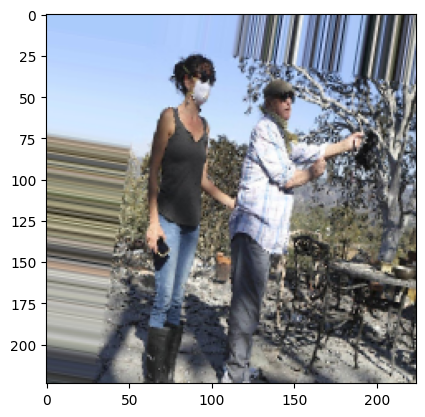

In [23]:
plt.imshow(cv2.cvtColor(X_2[2], cv2.COLOR_BGR2RGB))
plt.show()


Training ShallowNet...
Epoch 1/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.2381 - loss: 2.2510 - val_accuracy: 0.3433 - val_loss: 1.6658
Epoch 2/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3607 - loss: 1.6220 - val_accuracy: 0.3883 - val_loss: 1.5305
Epoch 3/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4374 - loss: 1.4389 - val_accuracy: 0.4636 - val_loss: 1.3652
Epoch 4/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4806 - loss: 1.3299 - val_accuracy: 0.4793 - val_loss: 1.2983
Epoch 5/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4956 - loss: 1.2783 - val_accuracy: 0.4996 - val_loss: 1.2808

Training ResNet50...
Epoch 1/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 233s 384ms/step - accuracy: 0.4197 - loss: 1.9067 - val_accuracy: 0.1323 - val_loss: 2243.7952
Epoch 2/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 134s 290ms/step - accuracy: 0.4986 - loss: 1.3781 - val_accuracy: 0.4901 - val_loss: 1.7036
Epoch 3/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 142s 291

Models saved successfully.


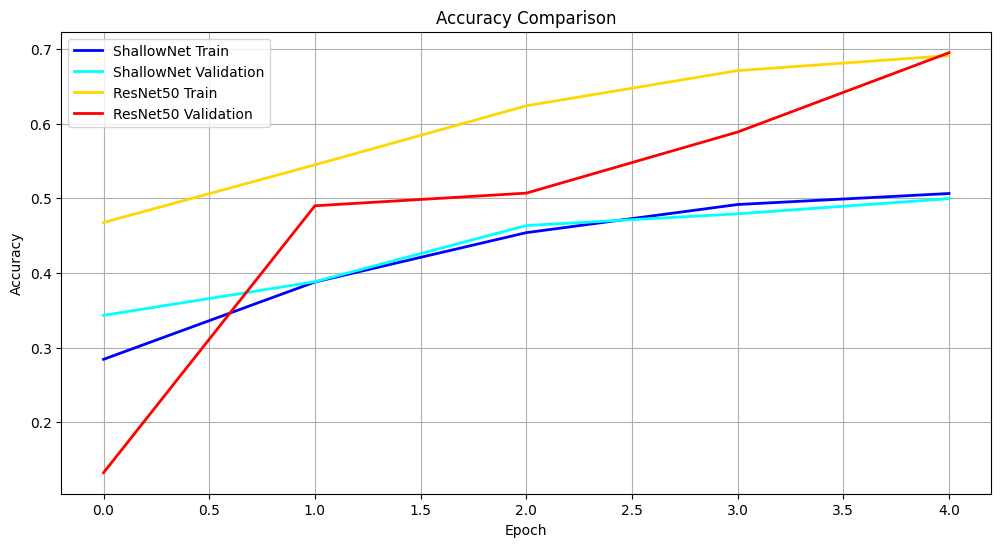

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

np.random.seed(221)
tf.random.set_seed(221)

X_input = np.array(X_input)
Y_input = np.array(Y_input)

def shallownet(input_shape=(224, 224, 3), classes=8):
    X_input = Input(input_shape)
    X = Conv2D(64, (7, 7), strides=(4, 4), activation='relu', name='conv1')(X_input)
    X = Conv2D(32, (8, 8), strides=(2, 2), activation='relu', name='conv2')(X)
    X = Conv2D(64, (7, 7), strides=(5, 5), activation='relu', name='conv3')(X)
    X = Conv2D(16, (2, 2), strides=(2, 2), activation='relu', name='conv4')(X)
    X = Flatten()(X)
    X = Dense(144, activation='relu')(X)
    X = Dense(classes, activation='softmax')(X)

    model = Model(inputs=X_input, outputs=X, name="ShallowNet")
    return model

resnet_model = ResNet50(weights=None, input_shape=(224, 224, 3), classes=8)

shallownet_model = shallownet()
shallownet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.compi
print("\nTraining ShallowNet...")
history_shallow = shallownet_model.fit(X_input, Y_input, epochs=5, validation_split=0.15, batch_size=32)

print("\nTraining ResNet50...")
history_resnet = resnet_model.fit(X_input, Y_input, epochs=5, validation_split=0.15, batch_size=32)

shallownet_model.save("shallownet_model.h5")
resnet_model.save("resnet50_model.h5")
print("Models saved successfully.")

plt.figure(figsize=(12, 6))
plt.plot(history_shallow.history['accuracy'], color='blue', linewidth=2, label='ShallowNet Train')
plt.plot(history_shallow.history['val_accuracy'], color='cyan', linewidth=2, label='ShallowNet Validation')
plt.plot(history_resnet.history['accuracy'], color='gold', linewidth=2, label='ResNet50 Train')
plt.plot(history_resnet.history['val_accuracy'], color='red', linewidth=2, label='ResNet50 Validation')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

def evaluate_model(model, model_name):
    Y_pred = model.predict(X_input)
    Y_pred_classes = np.argmax(Y_pred, axis=1)

    cm = confusion_matrix(Y_input, Y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(8), yticklabels=range(8))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    print(f"\nClassification Report for {model_name}:\n", classification_report(Y_input, Y_pred_classes))

evaluate_model(shallownet_model, "ShallowNet")
evaluate_model(resnet_model, "ResNet50")


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 55, 55, 64)        9472      
                                                                 
 conv2 (Conv2D)              (None, 24, 24, 32)        131104    
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          100416    
                                                                 
 conv4 (Conv2D)              (None, 2, 2, 16)          4112      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 144)               9360  

In [26]:
X_input.shape

(16117, 224, 224, 3)

In [ ]:
res = ResNet50(weights = None, classes = 8)

In [ ]:
res.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
history = res.fit(X_input, Y_input, epochs = 5, validation_split = 0.15)

Epoch 1/5
429/429 [==============================] - 191s 348ms/step - loss: 1.5145 - accuracy: 0.4777 - val_loss: 2.3871 - val_accuracy: 0.3242
Epoch 2/5
429/429 [==============================] - 152s 354ms/step - loss: 1.1329 - accuracy: 0.5760 - val_loss: 61.4328 - val_accuracy: 0.1452
Epoch 3/5
429/429 [==============================] - 183s 426ms/step - loss: 0.9734 - accuracy: 0.6332 - val_loss: 1.3299 - val_accuracy: 0.5364
Epoch 4/5
429/429 [==============================] - 153s 356ms/step - loss: 0.8187 - accuracy: 0.6886 - val_loss: 1.4369 - val_accuracy: 0.5633
Epoch 5/5
429/429 [==============================] - 152s 355ms/step - loss: 0.7407 - accuracy: 0.7179 - val_loss: 9.1044 - val_accuracy: 0.3730


In [ ]:
# Assuming 'res' is your trained ResNet50 model

# Specify the file path where you want to save your model
model_save_path = "resnet50_model.h5"

# Save the model
res.save(model_save_path)

print("Model saved successfully.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [ ]:
res.evaluate(X, labellist)

41/41 [==============================] - 6s 148ms/step - loss: 3.1628 - accuracy: 0.3114


[3.1627795696258545, 0.3114001452922821]

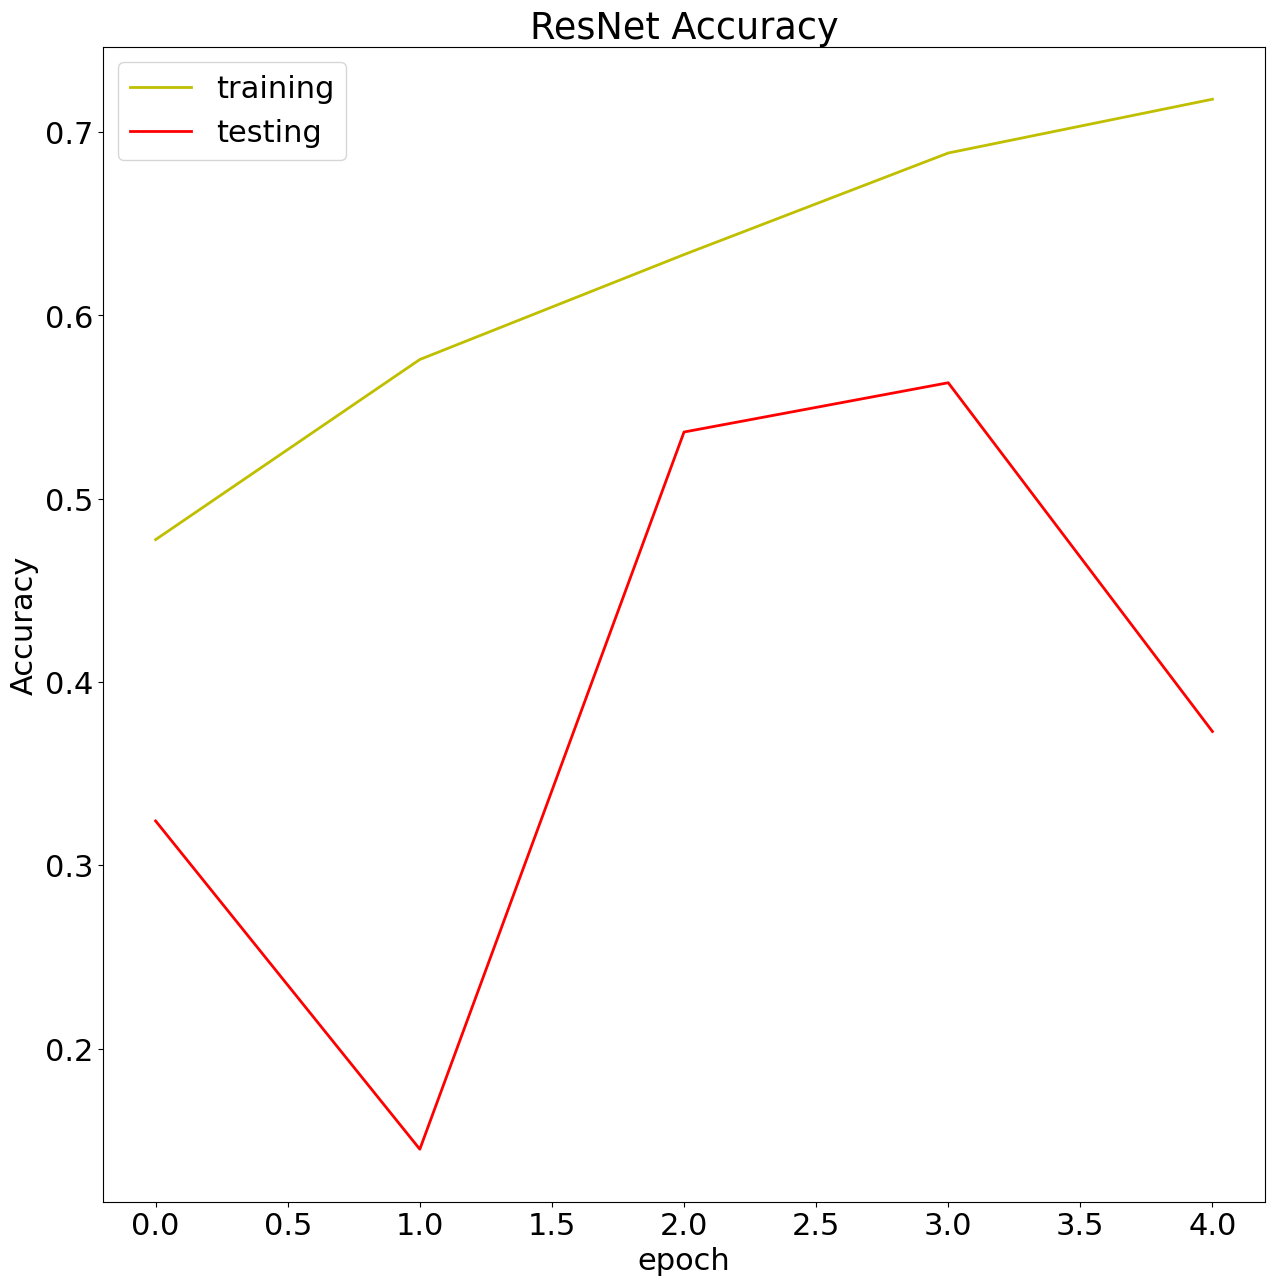

In [ ]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [15, 15]
plt.plot(history.history['accuracy'], c='y',linewidth=2.0)
plt.plot(history.history['val_accuracy'], c='r',linewidth=2.0)
plt.title('ResNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

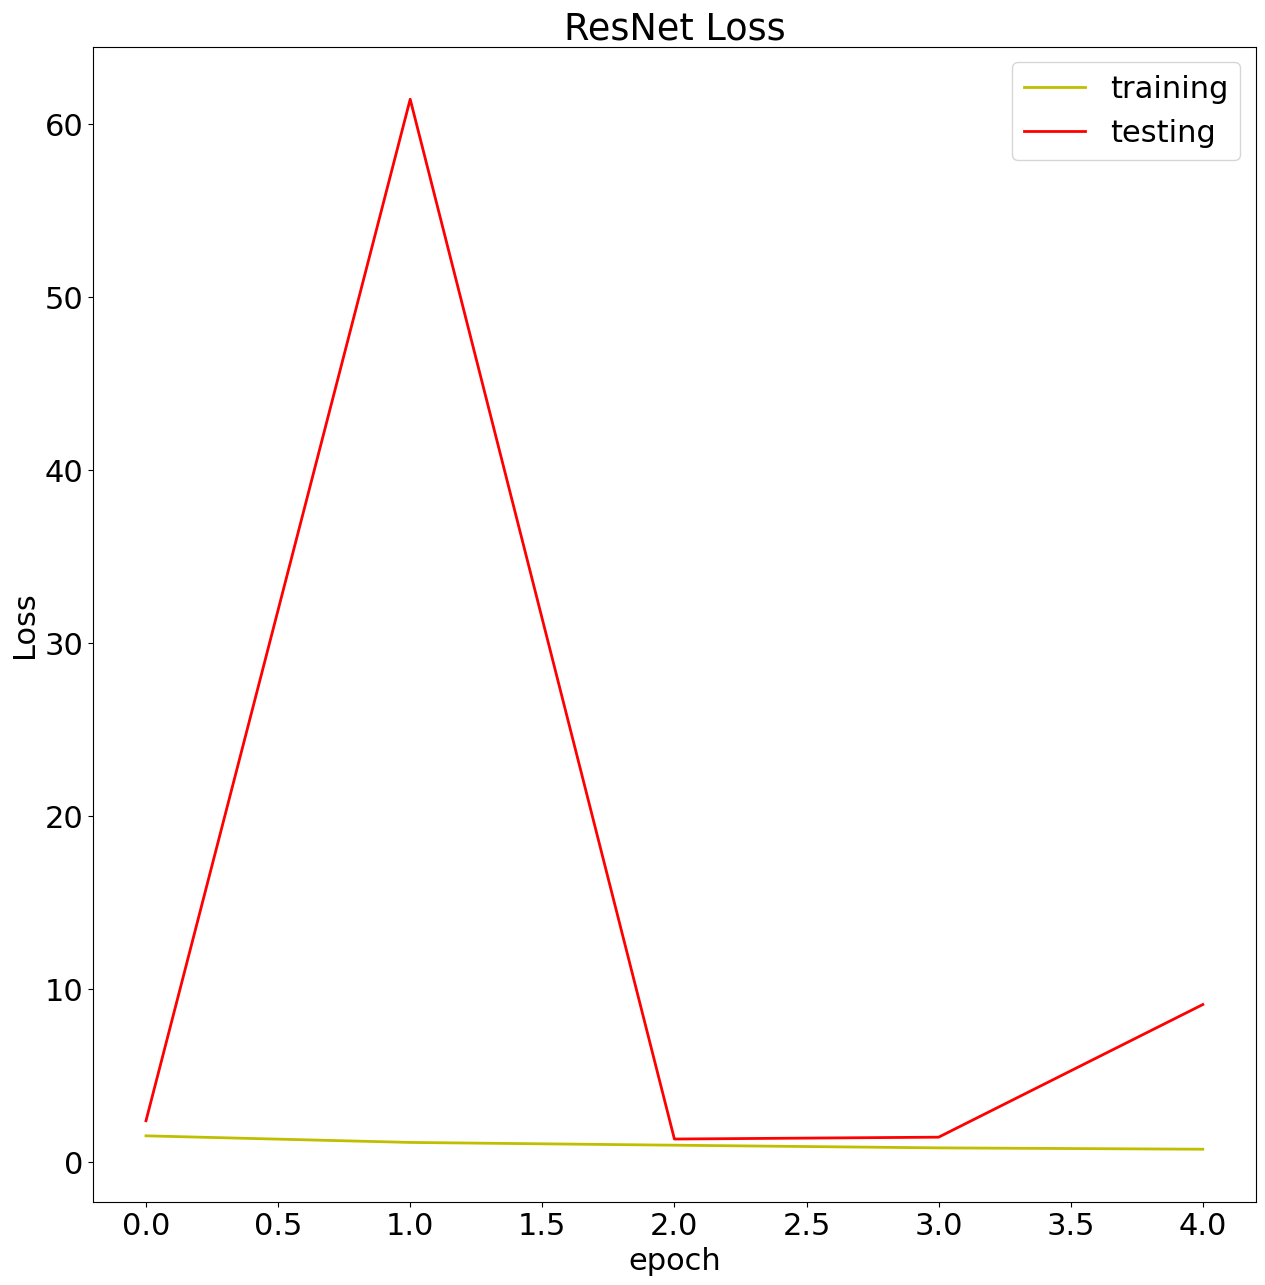

In [ ]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [15, 15]
plt.plot(history.history['loss'], c='y',linewidth=2.0)
plt.plot(history.history['val_loss'], c='r',linewidth=2.0)
plt.title('ResNet Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training','testing'])
plt.show()

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
data = pd.read_table('annotations/california_wildfires_final_data.tsv')
data = data.dropna(subset=['image_human', 'tweet_text'])

In [6]:
image_paths = list(data['image_path'])
image_labels = list(data['image_human'].astype('category').cat.codes)

In [7]:
img_size = (224, 224)
image_list = []
for path in image_paths:
    img = cv2.imread(path)
    img = cv2.resize(img, img_size)
    image_list.append(img)
image_array = np.array(image_list) / 255.0

In [8]:
max_words = 10000
max_length = 100

In [9]:
texts = list(data['tweet_text'])
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [10]:
X_text_train, X_text_test, X_img_train, X_img_test, y_train, y_test = train_test_split(
    padded_sequences, image_array, image_labels, test_size=0.2, random_state=42)

In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze VGG16 layers

image_input = Input(shape=(224, 224, 3))
x = base_model(image_input, training=False)
x = Flatten()(x)
image_features = Dense(256, activation='relu')(x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [12]:
text_input = Input(shape=(max_length,))
embedding = Embedding(input_dim=max_words, output_dim=128, input_length=max_length)(text_input)
bi_lstm = Bidirectional(LSTM(64, return_sequences=False))(embedding)
text_features = Dense(256, activation='relu')(bi_lstm)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
concatenated = Concatenate()([image_features, text_features])
output = Dense(len(set(image_labels)), activation='softmax')(concatenated)

In [14]:
model = Model(inputs=[image_input, text_input], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit([X_img_train, X_text_train], np.array(y_train), epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 318ms/step - accuracy: 0.4039 - loss: 2.7742 - val_accuracy: 0.6029 - val_loss: 1.3683
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.8038 - loss: 0.6284 - val_accuracy: 0.5837 - val_loss: 1.4801
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.8963 - loss: 0.3801 - val_accuracy: 0.4880 - val_loss: 1.7654
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.9572 - loss: 0.1698 - val_accuracy: 0.5120 - val_loss: 1.6521
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.9854 - loss: 0.0665 - val_accuracy: 0.5167 - val_loss: 1.6328
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.9943 - loss: 0.0272 - val_accuracy: 0.5263 - val_loss: 1.8095
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.9980 - loss: 0.0146 - val_accuracy: 0.5120 - val_loss: 1.7854
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.9978 - loss: 0.0118 - val_accur

In [15]:
model.save("multimodal_no_attention.h5")

In [16]:
y_pred = np.argmax(model.predict([X_img_test, X_text_test]), axis=1)
print(classification_report(y_test, y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.64      0.89      0.75       109
           2       0.00      0.00      0.00         1
           4       0.80      0.68      0.74        76
           5       0.60      0.36      0.45        25
           6       0.48      0.34      0.40        35
           7       0.67      0.29      0.40         7

    accuracy                           0.67       262
   macro avg       0.60      0.41      0.46       262
weighted avg       0.67      0.67      0.65       262



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


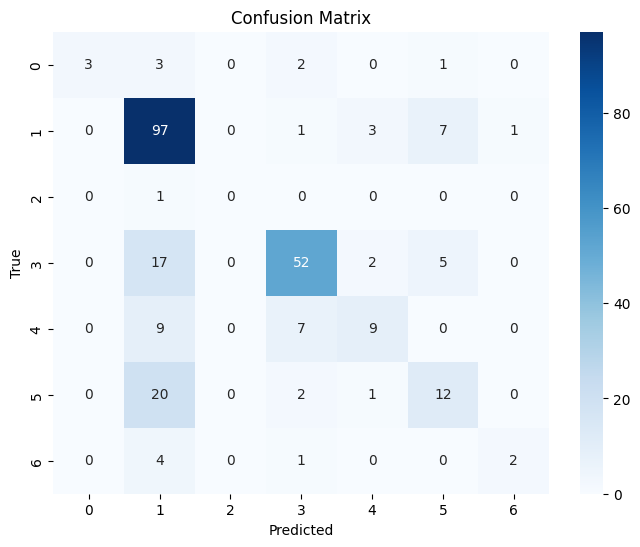

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [18]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, Embedding, Conv2D, Flatten, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [19]:
# Load dataset
df = pd.read_table('annotations/california_wildfires_final_data.tsv')

# Drop missing values
df = df.dropna(subset=['image_human', 'tweet_text'])

# Image Preprocessing
def load_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    return img

# Convert image paths to image arrays
image_data = np.array([load_image(img_path) for img_path in df['image_path']])

# Text Tokenization
MAX_VOCAB = 5000
MAX_LEN = 50

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet_text'])
sequences = tokenizer.texts_to_sequences(df['tweet_text'])
text_data = pad_sequences(sequences, maxlen=MAX_LEN)

# Class Mapping
class_mapping = {
    'not_relevant_or_cant_judge': 0,
    'infrastructure_and_utility_damage': 1,
    'affected_individuals': 2,
    'injured_or_dead_people': 3,
    'missing_or_found_people': 4,
    'rescue_volunteering_or_donation_effort': 5,
    'vehicle_damage': 6,
    'other_relevant_information': 7
}
labels = df['image_human'].map(class_mapping).values

# Train-Test Split
X_text_train, X_text_test, X_image_train, X_image_test, y_train, y_test = train_test_split(
    text_data, image_data, labels, test_size=0.2, random_state=42)

In [20]:
def build_multimodal_model_without_attention():
    # Image Model
    vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in vgg.layers:
        layer.trainable = False
    x_img = GlobalAveragePooling2D()(vgg.output)

    # Text Model
    text_input = Input(shape=(MAX_LEN,))
    x_txt = Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN)(text_input)
    x_txt = Bidirectional(LSTM(64, return_sequences=False))(x_txt)

    # Fusion
    combined = Concatenate()([x_img, x_txt])
    x = Dense(128, activation='relu')(combined)
    x = Dropout(0.5)(x)
    output = Dense(8, activation='softmax')(x)

    model = Model(inputs=[vgg.input, text_input], outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train Model
model_no_att = build_multimodal_model_without_attention()
history_no_att = model_no_att.fit(
    [X_image_train, X_text_train], y_train,
    validation_data=([X_image_test, X_text_test], y_test),
    epochs=10, batch_size=32)

# Save Model
model_no_att.save("multimodal_no_attention_c1.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 295ms/step - accuracy: 0.3553 - loss: 1.8464 - val_accuracy: 0.5611 - val_loss: 1.3144
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.4843 - loss: 1.4560 - val_accuracy: 0.5954 - val_loss: 1.2239
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.5241 - loss: 1.3350 - val_accuracy: 0.6031 - val_loss: 1.1873
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.5823 - loss: 1.1969 - val_accuracy: 0.6260 - val_loss: 1.1854
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.7594 - loss: 0.7941 - val_accuracy: 0.5916 - val_loss: 1.2889
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.8169 - loss: 0.5408 - val_accuracy: 0.5115 - val_loss: 1.5689
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.8722 - loss: 0.4000 - val_accuracy: 0.4962 - val_loss: 1.7164
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9077 - loss: 0.3304 - val_accurac

In [21]:
from tensorflow.keras.layers import Attention

def attention_layer(inputs):
    query, value = inputs, inputs
    attention = Attention()([query, value])
    return attention

def build_multimodal_model_with_attention():
    # Image Model
    vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in vgg.layers:
        layer.trainable = False
    x_img = GlobalAveragePooling2D()(vgg.output)

    # Text Model with Attention
    text_input = Input(shape=(MAX_LEN,))
    x_txt = Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN)(text_input)
    x_txt = Bidirectional(LSTM(64, return_sequences=True))(x_txt)
    x_txt = attention_layer(x_txt)  # Apply Attention
    x_txt = Flatten()(x_txt)

    # Fusion
    combined = Concatenate()([x_img, x_txt])
    x = Dense(128, activation='relu')(combined)
    x = Dropout(0.5)(x)
    output = Dense(8, activation='softmax')(x)

    model = Model(inputs=[vgg.input, text_input], outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train Model
model_att = build_multimodal_model_with_attention()
history_att = model_att.fit(
    [X_image_train, X_text_train], y_train,
    validation_data=([X_image_test, X_text_test], y_test),
    epochs=10, batch_size=32)

# Save Model
model_att.save("multimodal_attention_c1.h5")

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.3811 - loss: 1.6959 - val_accuracy: 0.5267 - val_loss: 1.3519
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.4971 - loss: 1.4470 - val_accuracy: 0.6145 - val_loss: 1.2263
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.5387 - loss: 1.3453 - val_accuracy: 0.5534 - val_loss: 1.2613
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.6075 - loss: 1.1452 - val_accuracy: 0.6221 - val_loss: 1.2148
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.7338 - loss: 0.7766 - val_accuracy: 0.4962 - val_loss: 1.3926
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.8095 - loss: 0.5246 - val_accuracy: 0.4618 - val_loss: 1.6610
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.8790 - loss: 0.3762 - val_accuracy: 0.4351 - val_loss: 1.9071
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.9166 - loss: 0.2519 - val_accurac

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
y_pred_no_att = np.argmax(model_no_att.predict([X_image_test, X_text_test]), axis=1)
y_pred_att = np.argmax(model_att.predict([X_image_test, X_text_test]), axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step


Confusion Matrix - No Attention


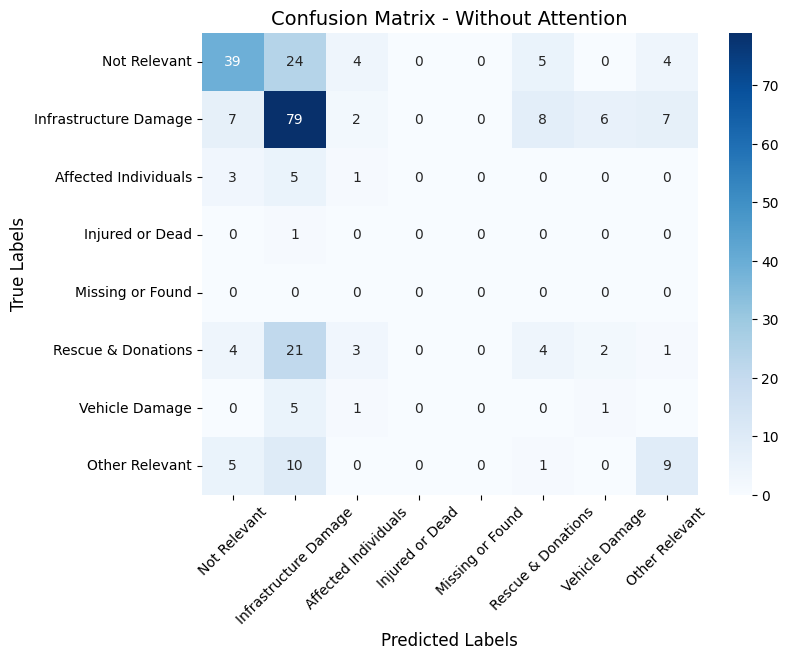

Confusion Matrix - With Attention


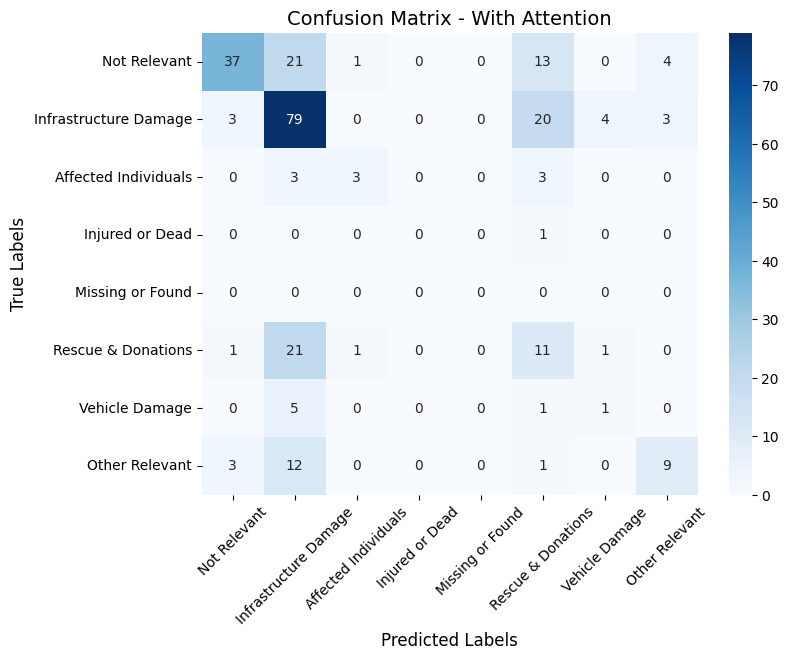

Classification Report - No Attention:
                        precision    recall  f1-score   support

         Not Relevant       0.67      0.51      0.58        76
Infrastructure Damage       0.54      0.72      0.62       109
 Affected Individuals       0.09      0.11      0.10         9
      Injured or Dead       0.00      0.00      0.00         1
     Missing or Found       0.00      0.00      0.00         0
   Rescue & Donations       0.22      0.11      0.15        35
       Vehicle Damage       0.11      0.14      0.12         7
       Other Relevant       0.43      0.36      0.39        25

             accuracy                           0.51       262
            macro avg       0.26      0.25      0.25       262
         weighted avg       0.50      0.51      0.49       262


Classification Report - With Attention:
                        precision    recall  f1-score   support

         Not Relevant       0.84      0.49      0.62        76
Infrastructure Damage       0.56 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# CrisisMMD Class Labels (Ensure they match your dataset)
class_labels = [
    "Not Relevant",
    "Infrastructure Damage",
    "Affected Individuals",
    "Injured or Dead",
    "Missing or Found",
    "Rescue & Donations",
    "Vehicle Damage",
    "Other Relevant"
]

# Ensure labels match expected classes
num_classes = len(class_labels)
all_labels = list(range(num_classes))  # [0, 1, 2, ..., 7]

# Function to plot confusion matrix with correct labeling
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=all_labels)  # Explicitly set labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel("Predicted Labels", fontsize=12)  # X-axis label
    plt.ylabel("True Labels", fontsize=12)       # Y-axis label
    plt.title(title, fontsize=14)                # Title
    plt.xticks(rotation=45)  # Ensure horizontal text for predicted labels
    plt.yticks(rotation=0)   # Ensure vertical text for true labels

    plt.show()

# Confusion Matrices for No Attention & With Attention
print("Confusion Matrix - No Attention")
plot_confusion_matrix(y_test, y_pred_no_att, "Confusion Matrix - Without Attention")

print("Confusion Matrix - With Attention")
plot_confusion_matrix(y_test, y_pred_att, "Confusion Matrix - With Attention")

# Classification Reports with Proper Labeling
print("Classification Report - No Attention:\n", classification_report(y_test, y_pred_no_att, target_names=class_labels, labels=all_labels))
print("\nClassification Report - With Attention:\n", classification_report(y_test, y_pred_att, target_names=class_labels, labels=all_labels))


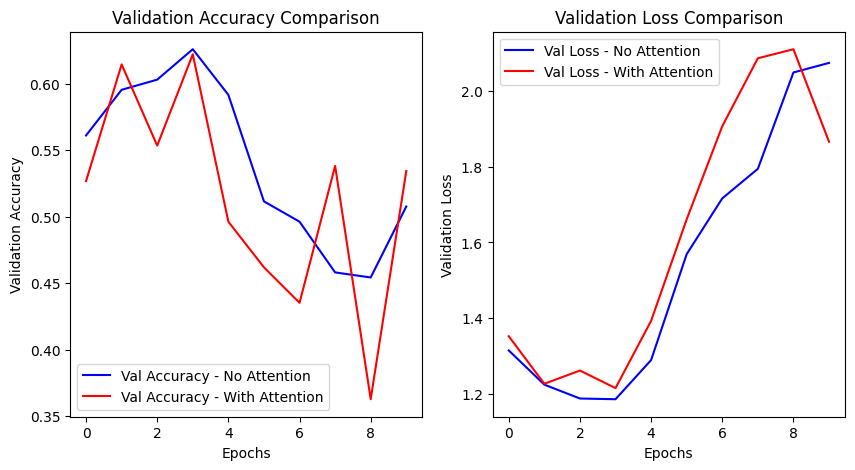

In [26]:
# Validation Accuracy and Loss Plot
plt.figure(figsize=(10,5))

# Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_no_att.history['val_accuracy'], label="Val Accuracy - No Attention", color='b')
plt.plot(history_att.history['val_accuracy'], label="Val Accuracy - With Attention", color='r')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Validation Accuracy Comparison")

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_no_att.history['val_loss'], label="Val Loss - No Attention", color='b')
plt.plot(history_att.history['val_loss'], label="Val Loss - With Attention", color='r')
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.title("Validation Loss Comparison")

plt.show()

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model_path = "multimodal_attention_c1.h5"  # Ensure correct path
model = tf.keras.models.load_model(model_path)

# Class labels from CrisisMMD
class_labels = [
    "Not Relevant",
    "Infrastructure Damage",
    "Affected Individuals",
    "Injured or Dead",
    "Missing or Found",
    "Rescue & Donations",
    "Vehicle Damage",
    "Other Relevant"
]

# Load Tokenizer (Ensure it's the same one used for training)
tokenizer = Tokenizer()
max_text_length = 50  # Set this to match training config

In [28]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Ensure size matches model input
    img = img.astype("float32") / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def preprocess_text(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_text_length, padding="post")
    return np.array(padded_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Category: Infrastructure Damage


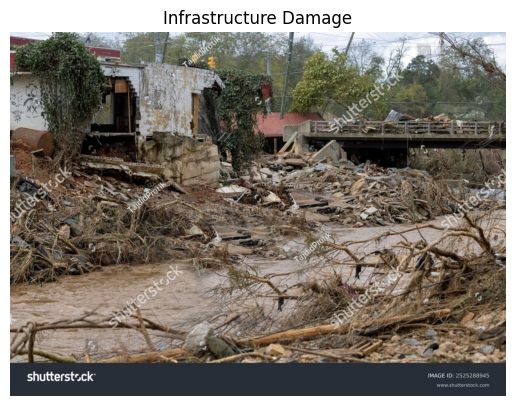

In [29]:
# Example Case
tweet_text = "A bridge collapsed due to flooding, blocking emergency routes."
image_path = "/content/tweetImage.jpg"  # Path to test image

# Preprocess inputs
processed_text = preprocess_text(tweet_text)
processed_image = preprocess_image(image_path)

# Model prediction
prediction = model.predict([processed_image, processed_text])
predicted_class = np.argmax(prediction)
category = class_labels[predicted_class]

# Display Result
print(f"Predicted Category: {category}")

# Show Image
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(category)
plt.show()


In [30]:
from google.colab import files
files.download("multimodal_attention_c1.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import tensorflow as tf
print(tf.__version__)  # Note this version


2.18.0


Enter the tweet text: A bridge collapsed due to flooing
Please upload the related image:


Saving stock-photo-crashing-waves-from-hurricane-helene-intensify-destroying-houses-along-the-coastline-as-the-storm-2525288945.jpg to stock-photo-crashing-waves-from-hurricane-helene-intensify-destroying-houses-along-the-coastline-as-the-storm-2525288945.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
Predicted Category: Infrastructure Damage


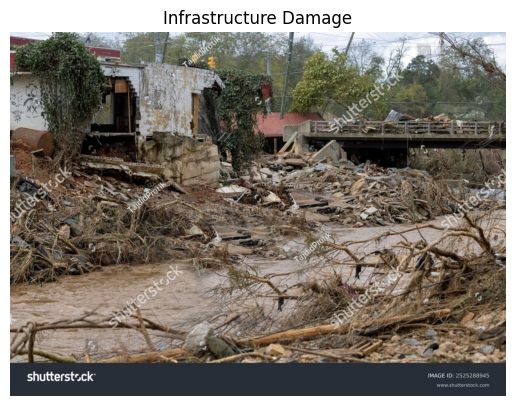

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model_file_path = "multimodal_attention_c1.h5"  # Ensure correct path
multimodal_model = tf.keras.models.load_model(model_file_path)

# Class labels from CrisisMMD
disaster_categories = [
    "Not Relevant",
    "Infrastructure Damage",
    "Affected Individuals",
    "Injured or Dead",
    "Missing or Found",
    "Rescue & Donations",
    "Vehicle Damage",
    "Other Relevant"
]

# Load Tokenizer (Ensure it's the same one used for training)
text_tokenizer = Tokenizer()
max_sequence_length = 50  # Set this to match training config

# Function to preprocess image
def process_disaster_image(uploaded_image_path):
    img = cv2.imread(uploaded_image_path)
    img = cv2.resize(img, (224, 224))  # Ensure size matches model input
    img = img.astype("float32") / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to preprocess text
def process_disaster_text(input_tweet):
    sequence = text_tokenizer.texts_to_sequences([input_tweet])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding="post")
    return np.array(padded_sequence)

# Get user input for text
tweet_description = input("Enter the tweet text: ")

# Upload image
print("Please upload the related image:")
uploaded_file = files.upload()  # User uploads an image
uploaded_image_filename = list(uploaded_file.keys())[0]  # Get the uploaded image filename

# Preprocess inputs
processed_tweet_text = process_disaster_text(tweet_description)
processed_tweet_image = process_disaster_image(uploaded_image_filename)

# Model prediction
model_output = multimodal_model.predict([processed_tweet_image, processed_tweet_text])
predicted_label_index = np.argmax(model_output)
predicted_disaster_category = disaster_categories[predicted_label_index]

# Display Result
print(f"Predicted Category: {predicted_disaster_category}")

# Show Image
plt.imshow(cv2.cvtColor(cv2.imread(uploaded_image_filename), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(predicted_disaster_category)
plt.show()


Training Without Attention Model...
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 530ms/step - accuracy: 0.1148 - loss: 2.0840 - val_accuracy: 0.1000 - val_loss: 2.0828
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 450ms/step - accuracy: 0.6276 - loss: 1.8057 - val_accuracy: 0.1200 - val_loss: 2.3085
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 472ms/step - accuracy: 0.9587 - loss: 0.3111 - val_accuracy: 0.1050 - val_loss: 3.4403
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 471ms/step - accuracy: 1.0000 - loss: 0.0223 - val_accuracy: 0.1000 - val_loss: 3.9196
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 470ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.1150 - val_loss: 4.2352


Model saved as multimodal_model_no_attention.h5

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step
Classification Report for Without Attention Model:
              precision    recall  f1-score   support

           0       0.72      0.87      0.78       119
           1       0.83      0.80      0.82       105
           2       0.92      0.81      0.86       121
           3       0.83      0.87      0.85       132
           4       0.77      0.83      0.80       131
           5       0.80      0.81      0.80       137
           6       0.92      0.77      0.84       126
           7       0.85      0.82      0.84       129

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



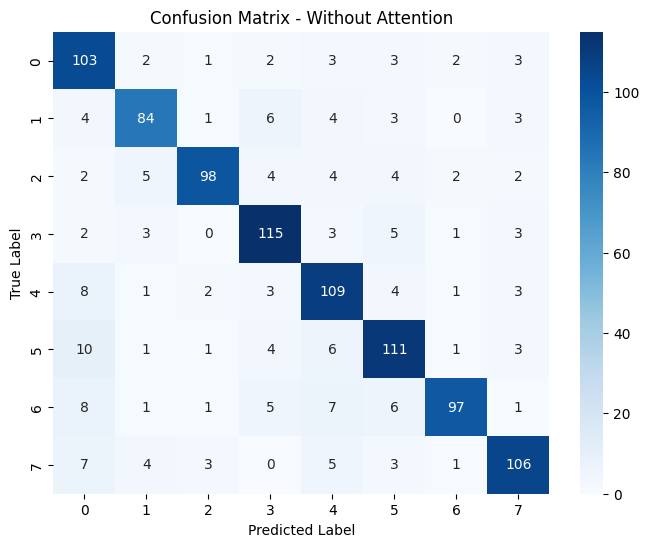

Training With Attention Model...
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 498ms/step - accuracy: 0.1265 - loss: 2.0822 - val_accuracy: 0.1400 - val_loss: 2.0851
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 461ms/step - accuracy: 0.3934 - loss: 1.8461 - val_accuracy: 0.1450 - val_loss: 2.6896
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 472ms/step - accuracy: 0.8615 - loss: 0.4351 - val_accuracy: 0.1450 - val_loss: 3.6460
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 458ms/step - accuracy: 0.9779 - loss: 0.0839 - val_accuracy: 0.1700 - val_loss: 3.9226
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 458ms/step - accuracy: 0.9948 - loss: 0.0264 - val_accuracy: 0.1550 - val_loss: 4.5811


Model saved as multimodal_model_attention.h5

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step
Classification Report for With Attention Model:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       119
           1       0.73      0.86      0.79       105
           2       0.89      0.80      0.84       121
           3       0.90      0.83      0.86       132
           4       0.73      0.85      0.79       131
           5       0.88      0.81      0.84       137
           6       0.90      0.77      0.83       126
           7       0.88      0.84      0.86       129

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



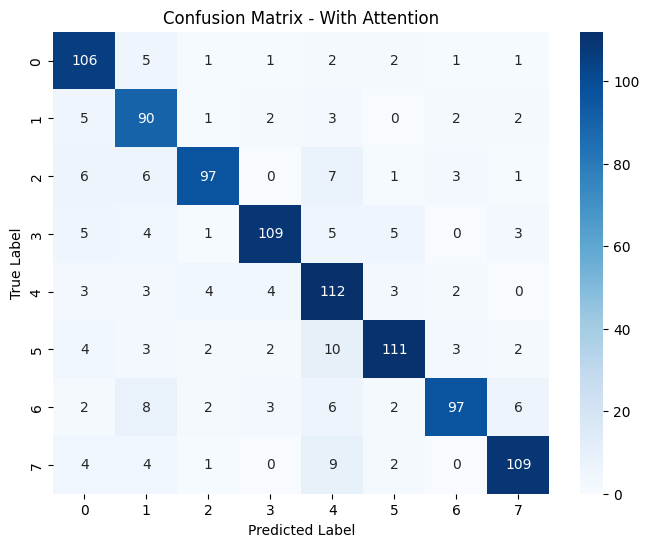

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Embedding, Flatten, Dropout, GlobalAveragePooling2D, Concatenate, Attention
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
num_classes = 8
max_length = 100
vocab_size = 5000
embedding_dim = 100
input_shape = (224, 224, 3)
num_samples = 1000


# Text Model (BiLSTM)
def text_model(input_length, vocab_size, embedding_dim, with_attention=False):
    text_input = Input(shape=(input_length,))
    x = Embedding(vocab_size, embedding_dim)(text_input)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)

    if with_attention:
        attn = Attention()([x, x])
        x = Flatten()(attn)
    else:
        x = Flatten()(x)

    return text_input, x

# Image Model (VGG16)
def image_model(input_shape):
    base_model = VGG16(weights=None, include_top=False, input_shape=input_shape)
    x = GlobalAveragePooling2D()(base_model.output)
    image_input = base_model.input
    return image_input, x

# Build multimodal models
def multimodal_model(with_attention=False):
    text_input, text_features = text_model(max_length, vocab_size, embedding_dim, with_attention)
    image_input, image_features = image_model(input_shape)

    merged = Concatenate()([text_features, image_features])
    merged = Dense(128, activation='relu')(merged)
    merged = Dropout(0.3)(merged)
    output = Dense(num_classes, activation='softmax')(merged)

    model = Model(inputs=[text_input, image_input], outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate both models
for use_attention in [False, True]:
    model_type = "With Attention" if use_attention else "Without Attention"
    print(f"Training {model_type} Model...")

    model = multimodal_model(with_attention=use_attention)
    history = model.fit([X_text, X_images], Y_labels, epochs=5, validation_split=0.2, batch_size=32, verbose=1)

    # Save the model
    model_name = f"multimodal_model_{'attention' if use_attention else 'no_attention'}.h5"
    model.save(model_name)
    print(f"Model saved as {model_name}\n")

    # Predictions
    Y_pred = np.argmax(model.predict([X_text, X_images]), axis=1)

    # Classification Report
    print(f"Classification Report for {model_type} Model:")
    print(classification_report(Y_labels, Y_pred))

    # Confusion Matrix
    cm = confusion_matrix(Y_labels, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_type}")
    plt.show()
